## Solucion Parcial 2. Tema 1

In [1]:
import numpy as np 
from sympy import *
from IPython.display import Image,Latex

En la figura $1$ se muestra las soluciones para una masa de suelo sometido a una carga superficial $P$ y una carga uniforme superficial $w$ .  Los esfuerzos al interior del suelo debidos a la carga $P$ y $w$, en un sistema  coordenado cilíndrico $\left(r,{\theta},z \right)$, están dados por:

$[\sigma]_P = -\dfrac{2P}{\pi r} \left[ \begin{array}{ccc}
\cos\theta & 0 & 0\\ 
0 & 0 & 0\\
0 & 0 & 0\\
\end{array}  \right] \hspace{2cm}
[\sigma]_w = -\dfrac{w}{\pi} \left[ \begin{array}{ccc}
\pi + 2\theta - \sin \left(2\theta \right)  & 1 -\cos \left(2\theta\right) & 0\\ 
1 - \cos \left(2\theta \right)  & \pi + 2\theta + \sin \left(2\theta \right) & 0\\
0 & 0 & 0\\
\end{array}  \right] $

Donde $P$ y $w$ son las cargas, $\theta$ es el ángulo medido desde la vertical y positivo en sentido antihorario.

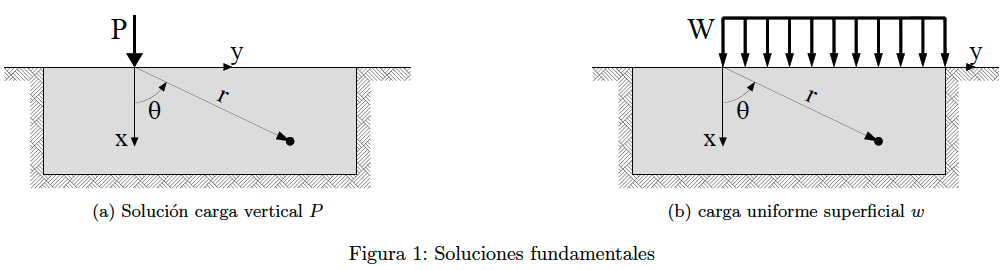

In [2]:
Image(filename='fig1_NB5.png',width=1000)

Si a la masa de suelo se transmiten de manera simultanea las cargas $P=100$ $Ton/m $ y $w= (100 + tiempo)$ $Ton/m^2$, y se quiere instalar un sistema de acueducto conformado por dos tuberías A y B (de díametro despreciable) perpendicular al plano mostrado ($XY$), en donde la profundad para la tubería A es $H_{A} = (1.0 / \pi)$ $m$ y para la tubería B  es $H_{B} = 0.75 H_{A}$. La posición de las cargas y las tuberías se muestran en la figura 2. 


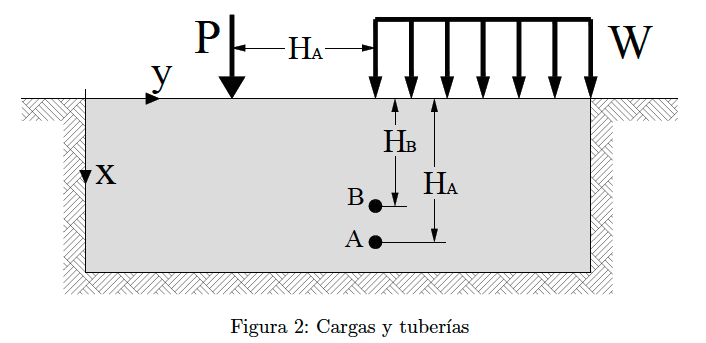

In [3]:
Image(filename='fig2_NB5.png',width=600)

* Determine cuál tubería falla primero y en que tiempo se produce la falla si se sabe que el material de la tubería A es infinitamente resistente a esfuerzos cortantes pero no soporta esfuerzos axiales mayores o iguales a $210,5\dfrac{Ton}{m^2}$  y el material de la tubería B es infinitamente resistente a esfuerzos axiales pero no sorporta esfuerzos cortantes mayores o iguales a $100,25\dfrac{Ton}{m^2}$. 

****
**Solución:**

Definicion de variables:

In [4]:
P = 100
Ha = 1.0 / np.pi
Hb = 0.75 * Ha
Wo = 100
print 'Ha=', np.round(Ha,2), 'Hb=', np.round(Hb,2)

Ha= 0.32 Hb= 0.24


************
** a) Definición de estado de esfuerzo (tensión) debidos a la carga $P$**

* Para la tubería A

In [5]:
FacP = -2.0 * P / (np.pi)     
Ra = np.sqrt(2.0) * Ha         # Distancia al punto
tetaa = np.pi / 4.0            # Angulo np.

sigmaPa = FacP / Ra * np.array([[np.cos(tetaa),0,0],[0,0,0],[0,0,0]])
print 
print 'sigmaPa ='
print sigmaPa


sigmaPa =
[[-100.  -0.  -0.]
 [ -0.  -0.  -0.]
 [ -0.  -0.  -0.]]


* Para la tubería B

In [6]:
tetab = np.arctan(Ha / Hb)
Rb = Ha / np.sin(tetab)              
sigmaPb = FacP / Rb * np.array([[np.cos(tetab),0,0],[0,0,0],[0,0,0]])

In [7]:
print 
print 'sigmaPb ='
print
print sigmaPb


sigmaPb =

[[-96.  -0.  -0.]
 [ -0.  -0.  -0.]
 [ -0.  -0.  -0.]]


****
** b) Definición del estado de tension debido la carga $w$ **

* Para la tubería A y B

Si se revisan las funciones de esfuerzo se puede ver que como en ángulo $\theta$ es el mismo para ambas tuberías la solución también es la misma. En este caso $\theta=0^{\circ}$


In [8]:
W = Symbol('W')

In [9]:
tetaW = 0                       # Angulo
sigmaW = -W / np.pi * np.array([[(np.pi) + 2.0*tetaW - np.sin(2.0*tetaW), 1.0 - np.cos(2.0 * tetaW),0],[1.0 - np.cos(2.0 * tetaW),np.pi + 2.0*tetaW + np.sin(2.0*tetaW),0],[0,0,0]])
print
print 'sigmaW='
print 
print (sigmaW)


sigmaW=

[[-1.0*W 0 0]
 [0 -1.0*W 0]
 [0 0 0]]


****
** c) Superposición de cargas **

Para hacer la superposición de las cargas es necesario que ambas estén asociadas a las mismas caras perpendiculares. En otras palabras es necesario que estén en el mismo sistema de referencia. Para hacer esto se debe considerar transformar por rotación un estado de esfuerzos para llevarlo a la dirección del otro. No obstante, si se observa el tensor de la carga $w$ se puede notar que en el plano $xy$ (plano a considerar la rotación) es invariante ante rotación. Esto debido a que en ese plano ambos sigmas son iguales lo que origina que el círculo de Mohr es un punto. Con esta aclaración se tiene que la superposición en este caso se puede obtener sumando ambos tensores de forma directa. 

* Para la tubería A

In [10]:
sigmaWPa = sigmaW + sigmaPa

In [11]:
print 'sigmaWPa='
print 
print sigmaWPa

sigmaWPa=

[[-1.0*W - 100.0 0 0]
 [0 -1.0*W 0]
 [0 0 0]]


* Para la tubería B

In [12]:
sigmaWPb = sigmaW + sigmaPb

In [13]:
print 'sigmaWPb='
print 
print sigmaWPb

sigmaWPb=

[[-1.0*W - 96.0 0 0]
 [0 -1.0*W 0]
 [0 0 0]]


****
** d) Valores extremos **

Los dos estados de tensiones anteriores ya quedaron en direcciones principales. Es decir ya tengo los valores principales y por tanto puedo conocer los valores extremos normales y cortantes y compararlos con las condiciones de falla dadas. 

* Tubería A

Los valores principales, todos a compresión, son:

In [14]:
print sigmaWPa[0,0],';',sigmaWPa[1,1], ';', sigmaWPa[2,2]
print

-1.0*W - 100.0 ; -1.0*W ; 0



Por lo que el valor máximo axial (que es la condición de falla) es: 

In [15]:
sigmax = np.abs(sigmaWPa[0,0])
print 'sigmax =', sigmax
print

sigmax = Abs(1.0*W + 100.0)



e igualando a la condición de falla $210,5\dfrac{Ton}{m^2}$ se puede despejar $w$. Es decir

In [16]:
sigcrit = 210.5
Wa = sigcrit - 100.0
print
print 'Wa=', Wa, 'Ton/m^2'
print 


Wa= 110.5 Ton/m^2



* Para la Tubería B se tiene: 

Los valores principales, todos a compresión, son:

In [17]:
print sigmaWPb[0,0],';',sigmaWPb[1,1], ';', sigmaWPb[2,2]
print

-1.0*W - 96.0 ; -1.0*W ; 0



Por lo que el valor de corte máximo (que es la condición de falla) es: 

In [18]:
taumax = np.abs(sigmaWPb[0,0]) / 2.0
print 'taumax =', taumax
print

taumax = 0.5*Abs(1.0*W + 96.0)



e igualando a la condición de falla $100,25\dfrac{Ton}{m^2}$ se puede despejar $w$. Es decir

In [19]:
taucrit = 100.25
Wb = 2.0 *taucrit - 96.0
print
print 'Wb=', Wb, 'Ton/m^2'


Wb= 104.5 Ton/m^2


**** 
** e) Determinación del tiempo **

Con estos valores Wa y Wb podemos despajar los tiempos para cada tubería 

In [20]:
ta = Wa - Wo
tb = Wb - Wo
print 
print 'Tiempo falla tuberia a =', ta, 'unidades de tiempo'
print 'Tiempo falla tuberia b =', tb, 'unidades de tiempo'


Tiempo falla tuberia a = 10.5 unidades de tiempo
Tiempo falla tuberia b = 4.5 unidades de tiempo


Con lo que se concluye que la tubería B falla primero

** f) Tarea **
* ¿Como sería la matriz de transformación que llevaría el tensor desde el sistema de referencia de la carga $P$ al sistema de la carga $W$?
* Hacer el ejercicio de transformación sin considerar el hecho que el estado de tensiones debido a la carga $W$ es invariante a rotación
